<a href="https://colab.research.google.com/github/Arjun-RY/Language-Identification/blob/main/Language_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import feature_extraction

In [2]:
df=pd.read_csv('/content/Language Detection.csv')
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [3]:
df.nunique()

Text        10267
Language       17
dtype: int64

In [4]:
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [5]:
df.isna().sum()

Text        0
Language    0
dtype: int64

In [6]:
mapping_product_name={"Sweedish":'Swedish','Portugeese':'Portugese'}
df.loc[:,'Language']=df["Language"].replace(mapping_product_name)

In [7]:
df['Language'].value_counts()

English      1385
French       1014
Spanish       819
Portugese     739
Italian       698
Russian       692
Swedish       676
Malayalam     594
Dutch         546
Arabic        536
Turkish       474
German        470
Tamil         469
Danish        428
Kannada       369
Greek         365
Hindi          63
Name: Language, dtype: int64

In [8]:
df=df.drop_duplicates()
df.shape

(10271, 2)

In [9]:
non_unique_rows=df[df.duplicated(['Text'])]['Text'].unique()
non_unique_rows

array(['suggestions.', 'pardon?', 'dedos cruzados.', 'slår mig.'],
      dtype=object)

In [10]:
a=df['Text'].value_counts()[df['Text'].value_counts()>1].index

In [11]:
df=df.reset_index()

In [12]:
for i in range(10271):
  if df.loc[i,'Text'] in a:
    print(df.loc[i])
    print(i)

index               1272
Text        suggestions.
Language         English
Name: 1269, dtype: object
1269
index                  3011
Text        dedos cruzados.
Language          Portugese
Name: 2998, dtype: object
2998
index          4117
Text        pardon?
Language     French
Name: 4095, dtype: object
4095
index               4151
Text        suggestions.
Language          French
Name: 4129, dtype: object
4129
index          4649
Text        pardon?
Language      Dutch
Name: 4623, dtype: object
4623
index                  5359
Text        dedos cruzados.
Language            Spanish
Name: 5332, dtype: object
5332
index            6975
Text        slår mig.
Language       Danish
Name: 6931, dtype: object
6931
index            8823
Text        slår mig.
Language      Swedish
Name: 8769, dtype: object
8769


In [13]:
df['Text'][10270]

'ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣುತ್ತಿದ್ದೀರಿ ಆದರೆ ನಾನು ಏನು ನೋಡುತ್ತಿದ್ದೇನೆ ನೀವು ಹೇಗೆ ಅವನಾಗಬಹುದು ನೀವು ಇಬ್ಬರು ತುಂಬಾ ಒಳ್ಳೆಯವರು'

In [14]:
def clean_text(x):
    x = re.sub(r'[\([{})\]!@#$,"%^*?:;~`]', ' ', x)
    x = re.sub(r"\\|[0-9]|/|-|_|'|\.", '', x)
    # Convert to lowercase
    x = re.sub('\s+', ' ', x)
    return x

# Apply the function to the 'Text' column
df['Text'] = df['Text'].map(clean_text)

In [15]:
df['Text']

0         Nature in the broadest sense is the natural p...
1         Nature can refer to the phenomena of the phys...
2        The study of nature is a large if not the only...
3        Although humans are part of nature human activ...
4         The word nature is borrowed from the Old Fren...
                               ...                        
10266    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10267    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10268    ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್...
10269    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10270    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10271, dtype: object

In [16]:
df['Text'][10270]

'ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣುತ್ತಿದ್ದೀರಿ ಆದರೆ ನಾನು ಏನು ನೋಡುತ್ತಿದ್ದೇನೆ ನೀವು ಹೇಗೆ ಅವನಾಗಬಹುದು ನೀವು ಇಬ್ಬರು ತುಂಬಾ ಒಳ್ಳೆಯವರು'

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
m=[]
for z in df['Text']:
  tokenizer = RegexpTokenizer('\w+')
  y=tokenizer.tokenize(z)
  a=' '.join(str(e) for e in y)
  m.append(a)
m[:5]

['Nature in the broadest sense is the natural physical material world or universe',
 'Nature can refer to the phenomena of the physical world and also to life in general',
 'The study of nature is a large if not the only part of science',
 'Although humans are part of nature human activity is often understood as a separate category from other natural phenomena',
 'The word nature is borrowed from the Old French nature and is derived from the Latin word natura or essential qualities innate disposition and in ancient times literally meant birth']

In [19]:
len(m)

10271

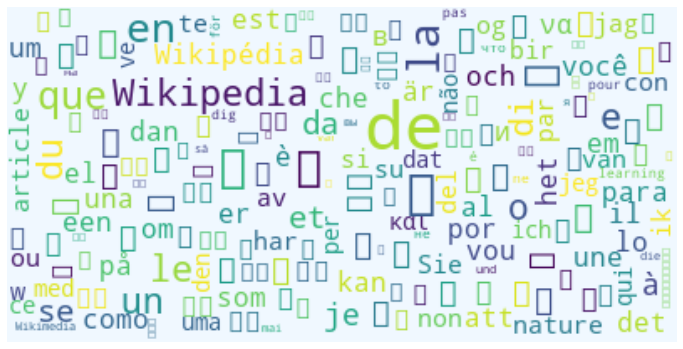

In [20]:
words=[]
for sentence in m:
  tokenizer = RegexpTokenizer('\w+')
  new_words=tokenizer.tokenize(sentence)
  for word in new_words:
    words.append(word) 
words

j = Counter(words)
wordcloud = WordCloud(
                background_color ='aliceblue',collocations=False,max_font_size=40).generate(" ".join([(k + ' ') * v for k,v in j.items()]))
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
len(words)

246943

In [22]:
len(j.items())

42273

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer() # Intialise the model 
values = tfidf_vectorizer.fit_transform(m)

# Show the Model as a pandas DataFrame
#tfidf=values.toarray()
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf=pd.DataFrame(values.toarray(), columns = feature_names)
tfidf

,aa,aan,aanbieden,aanbiedingen,aandacht,aangeboden,aangenaam,aangepast,aangeslagen,aangetroffen,...,ർവഹ,ർസ,ൽക,ൽഗ,ൽത,ൽപ,ൽവർ,ൾക,ൾപ,ൾമ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Language']=le.fit_transform(df['Language'])

In [25]:
X=tfidf
y=df['Language']

In [26]:
y.describe()

count    10271.000000
mean         7.810632
std          4.915832
min          0.000000
25%          3.000000
50%          8.000000
75%         12.000000
max         16.000000
Name: Language, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.metrics import classification_report,roc_auc_score,ConfusionMatrixDisplay

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred, multi_class ='ovr'))

0.9993292475968926


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9586374695863747


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'XGBoost': XGBClassifier()}

# Train and evaluate the models using train-test split
print("ROC-AUC scores and confusion matrices using train-test split")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy : {accuracy_score(y_test, y_pred)}')
    print(f'{name} ROC-AUC score: {roc_auc_score(y_test, y_pred)}')
